# Data Mining Project
### Giorgio Donati, g.donati24@studenti.unipi.it
### Pietro Francaviglia, p.francaviglia1@studenti.unipi.it
#### A.Y. 2021-2022


## Libraries and datasets

In [38]:
import numpy as np
import pandas as pd
import pickle
import seaborn as sns

from t2_constants import *
from t2_utility import *

In [39]:
with open(f'{PICKLE_FOLDER}{CLUST_DF}.pkl', 'rb') as f:
    clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{CLUST_DF}.pkl', 'rb') as f:
    pure_clustering_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{SELECTED}{USER_DF}.pkl', 'rb') as f:
    u_df = pickle.load(f)

with open(f'{PICKLE_FOLDER}{PURE}{SELECTED}{USER_DF}.pkl', 'rb') as f:
    pure_u_df = pickle.load(f)

In [40]:
clustering_df_array, clustering_df = scale_df(clustering_df, 1)
pure_clustering_df_array, pure_clustering_df = scale_df(pure_clustering_df, 1)

In [41]:
# Sum of Squared Errors: cohesion measure
# silhouette score: both cohesion and separation measure
clustering_scores_df = pd.DataFrame(columns = ['silhouette', 'SSE'], dtype=float)

## Hierarchical

#### Link methods
- complete: equivalent to Farthest Point Algorithm
- single: equivalent to Nearest Point Algorithm
- average: metric is average of distances of all pairs of points in the two clusters
- centroid: metric is distance between centroids

In [42]:
methods = ['complete', 'single', 'average', 'centroid']
best_n_clusters = 8

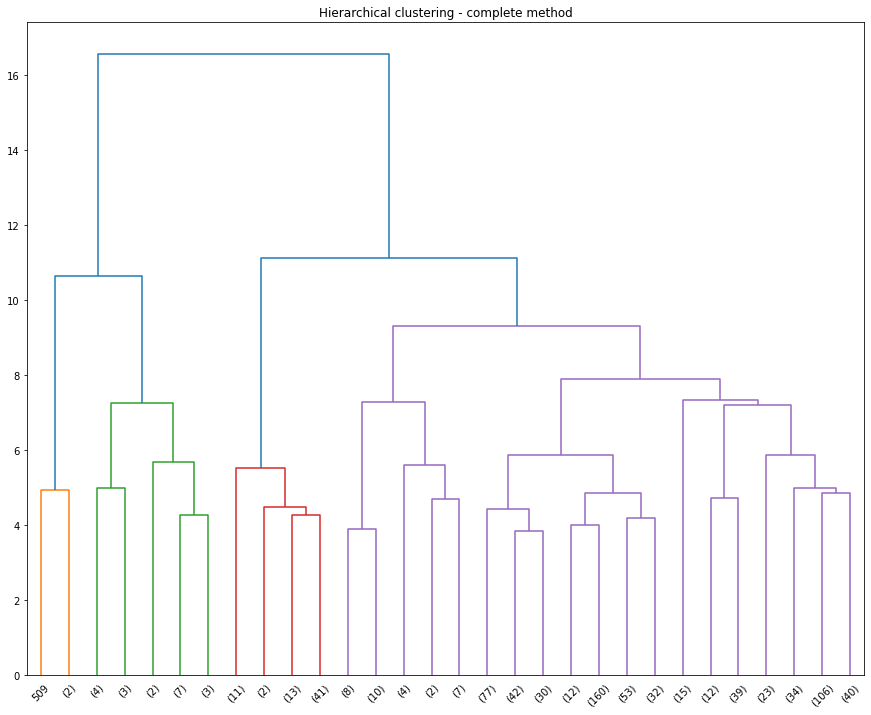

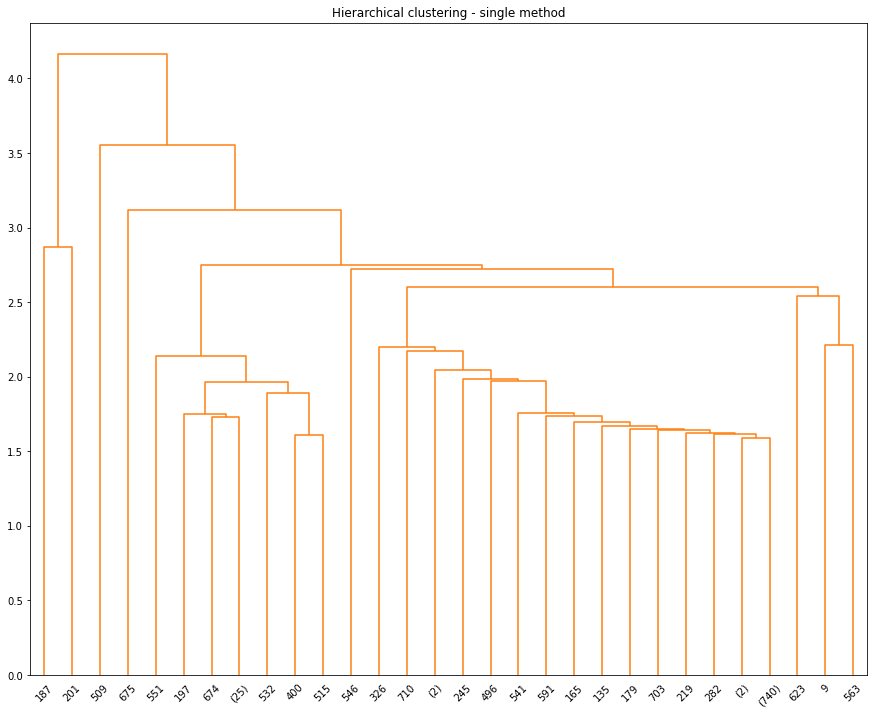

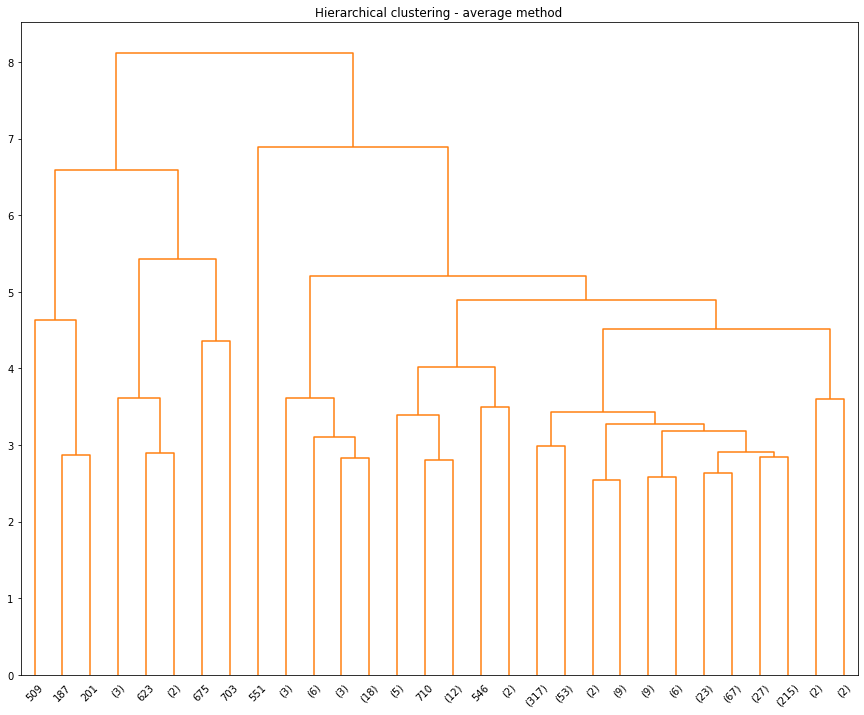

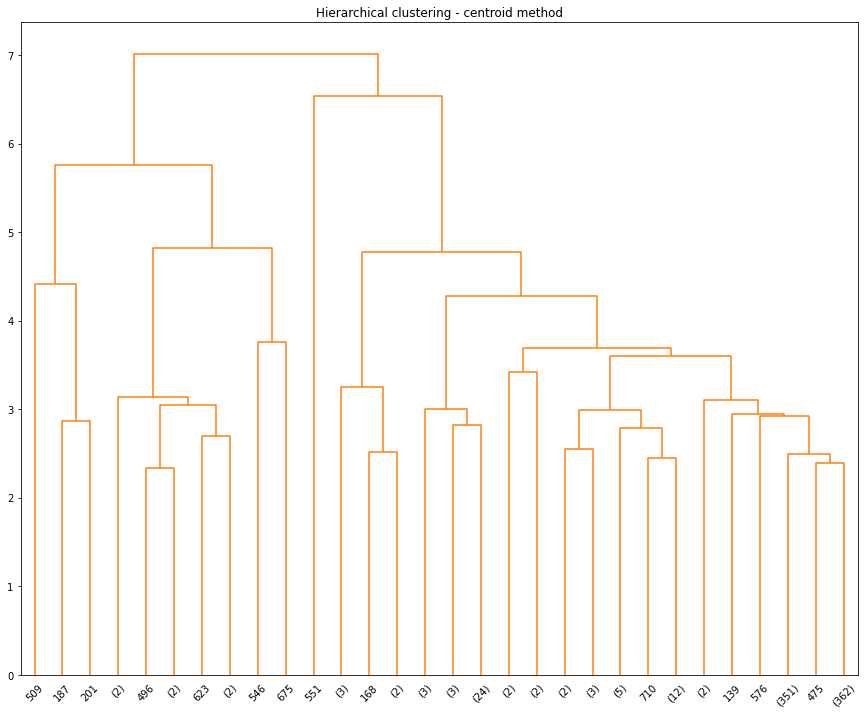

In [43]:
data_link_list = []
for method in methods:
    data_link_list.append(hierarchical_clustering(clustering_df_array, method, best_n_clusters, clustering_scores_df))

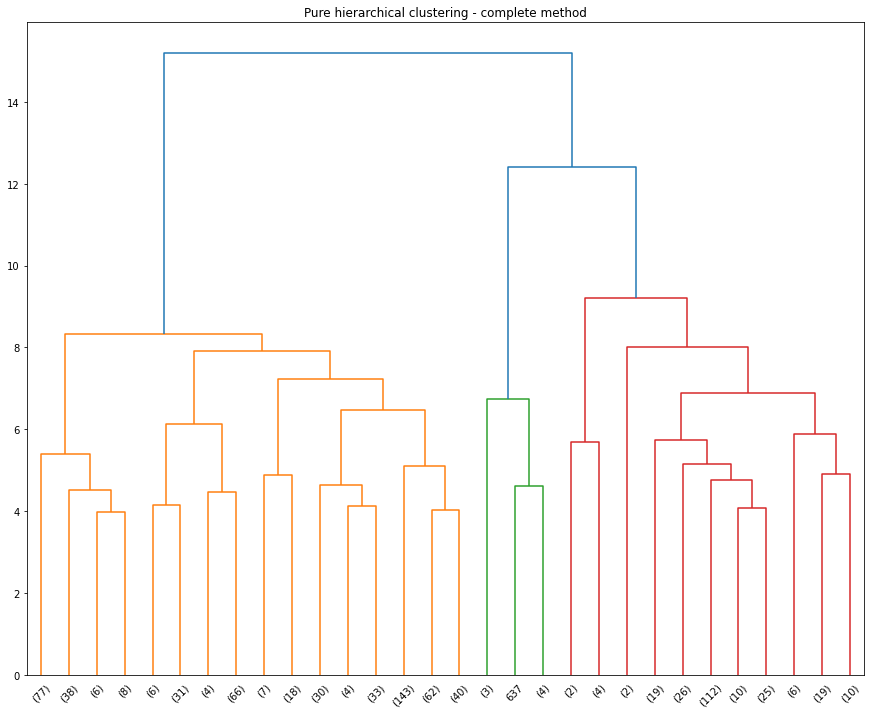

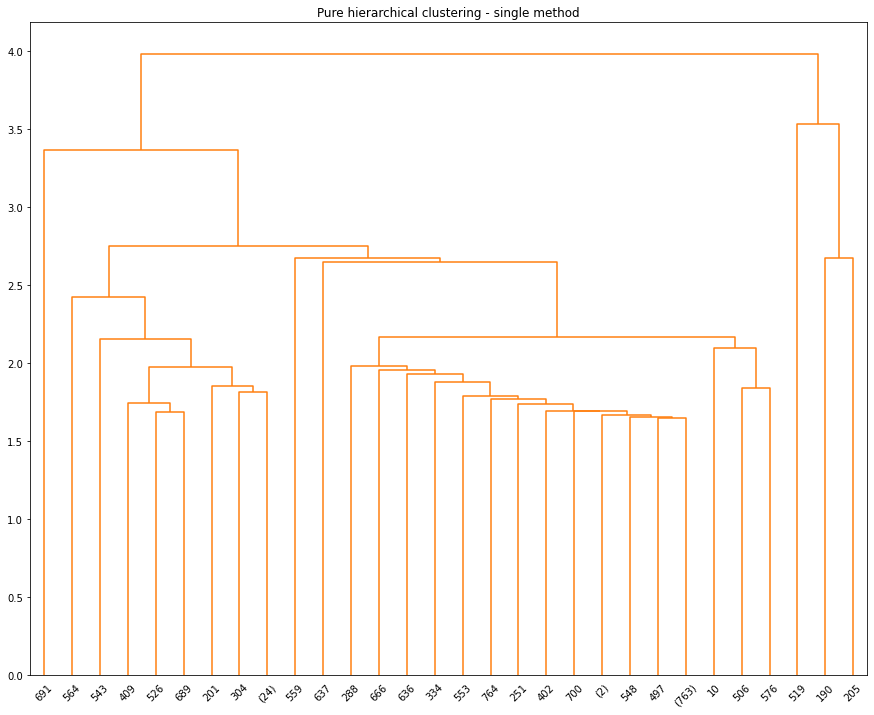

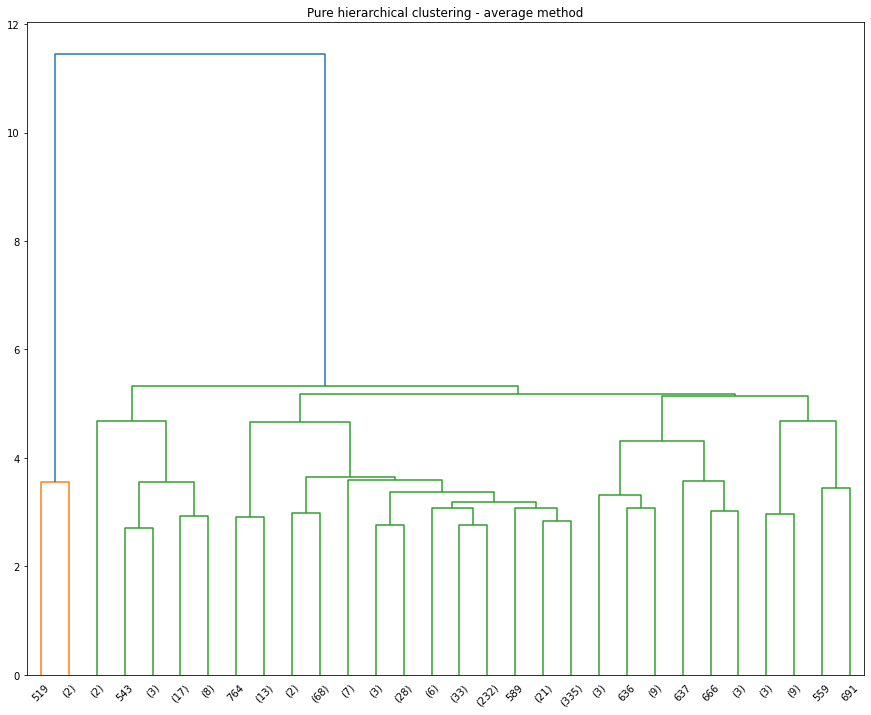

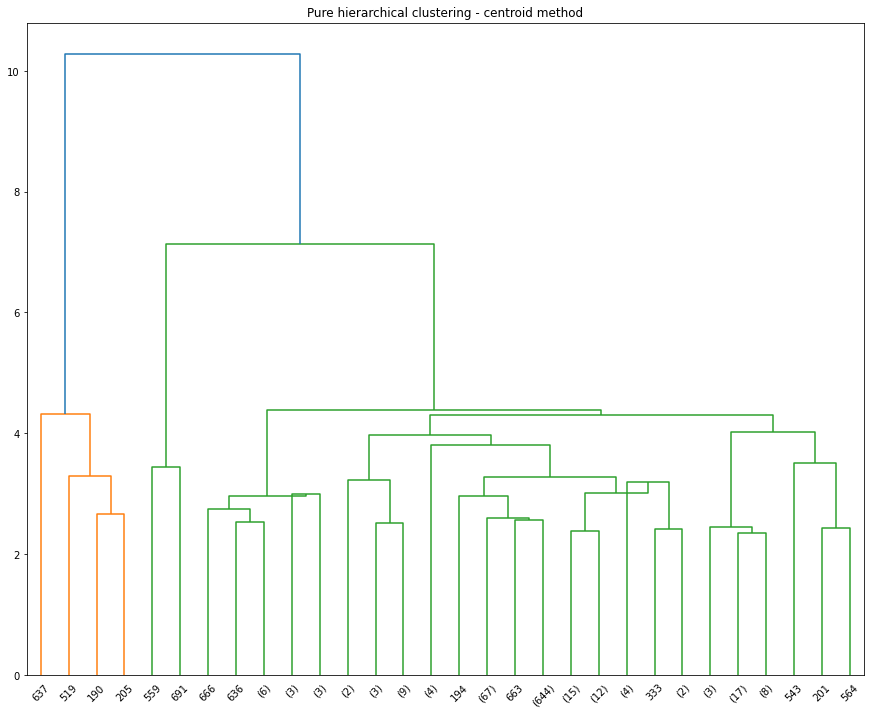

In [44]:
pure_data_link_list = []
for method in methods:
    pure_data_link_list.append(hierarchical_clustering(pure_clustering_df_array, method, best_n_clusters, clustering_scores_df, pure=1))

In [45]:
clustering_scores_df

,silhouette,SSE
hierarchical_complete,0.135155,2724.906495
hierarchical_single,0.388636,4360.884508
hierarchical_average,0.303771,3972.309575
hierarchical_centroid,-2.000000,5565.000000
pure_hierarchical_complete,0.137124,2759.427733
pure_hierarchical_single,0.387726,4608.197611
pure_hierarchical_average,0.192121,3901.396236
pure_hierarchical_centroid,0.536949,5543.556820


We plot only the cluster analysis of the complete method, because the others do not achieve great scores

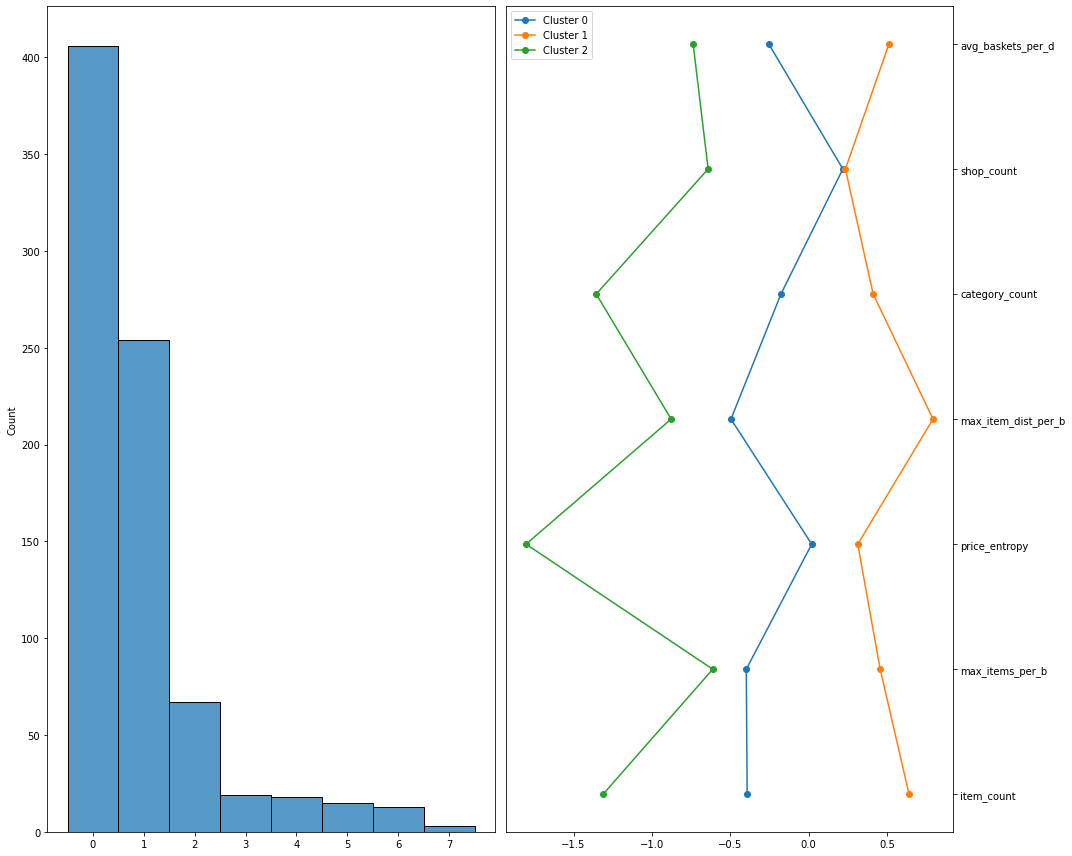

In [46]:
l = show_clusters(data_link_list[0], clustering_df_array, clustering_df, best_n_clusters)
u_df[LAB] = l
clustering_df[LAB] = l

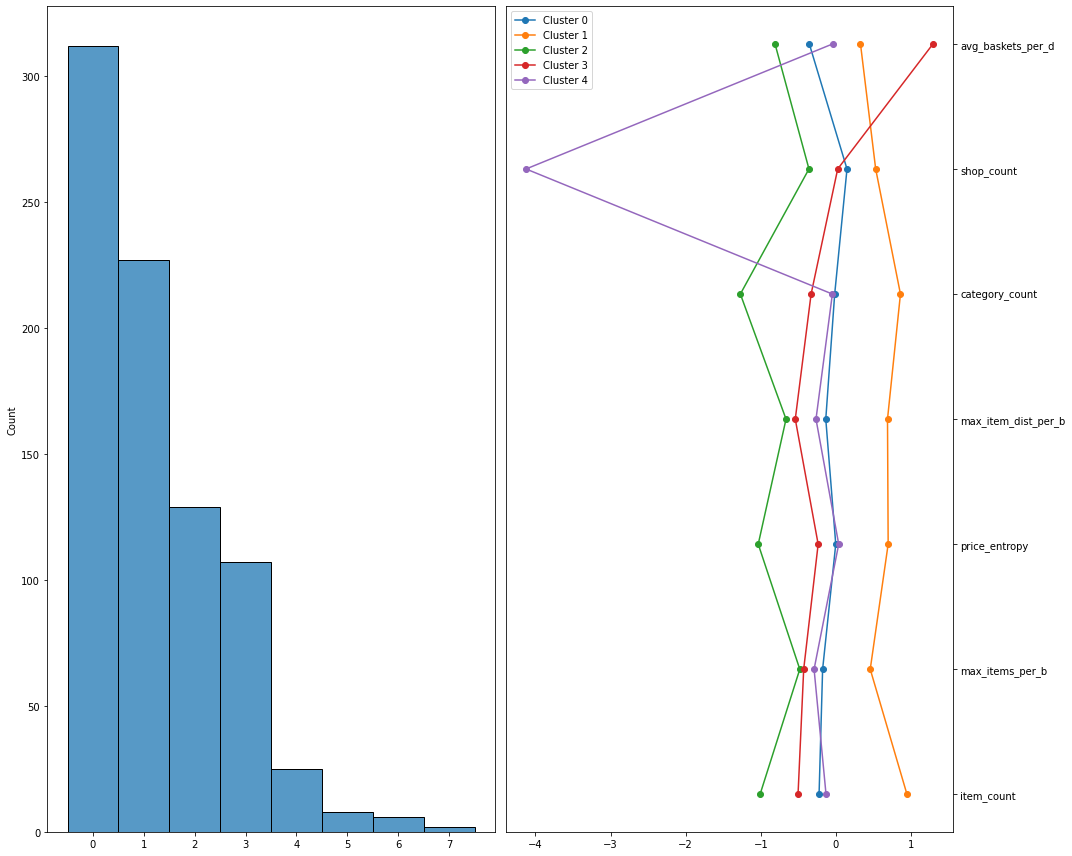

In [47]:
pl = show_clusters(pure_data_link_list[0], pure_clustering_df_array, pure_clustering_df, best_n_clusters)
pure_u_df[LAB] = pl
pure_clustering_df[LAB] = pl

<AxesSubplot:xlabel='label', ylabel='item_count'>

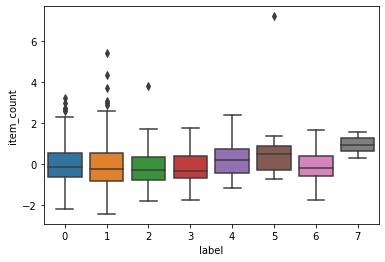

In [48]:
sns.boxplot(x=LAB, y=ICNT, data=clustering_df)

<AxesSubplot:xlabel='label', ylabel='price_entropy'>

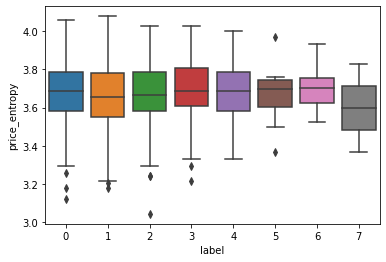

In [49]:
sns.boxplot(x=LAB, y=PE, data=pure_u_df)